In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn import svm

In [2]:
data = pd.read_csv('TAD_ChIP_strength_fpkm_size_E1_interaction_twoborerexpression_innerfpkm.tsv',sep='\t')
data_values = data.dropna()

In [3]:
A11 = pd.read_csv('A1A1.bed',header=None,sep='\t',names=['chrom','start','end'])
A12 = pd.read_csv('A1A2.bed',header=None,sep='\t',names=['chrom','start','end'])
A22 = pd.read_csv('A2A2.bed',header=None,sep='\t',names=['chrom','start','end'])
S11 = pd.read_csv('I1I1.bed',header=None,sep='\t',names=['chrom','start','end'])
S12 = pd.read_csv('I1I1.bed',header=None,sep='\t',names=['chrom','start','end'])
S22 = pd.read_csv('I1I1.bed',header=None,sep='\t',names=['chrom','start','end'])
SA = pd.read_csv('Agglo_Cluster3.bed',header=None,sep='\t',names=['chrom','start','end'])

In [6]:
data_sort = list(map(lambda x : pd.merge(data_values, x, how ='inner', on =['chrom', 'start', 'end']), [A11,A12,A22,S11,S12,S22,SA]))

In [7]:
data_all = pd.concat(data_sort)

In [14]:
labels = np.concatenate((np.repeat(np.array(1),len(data_sort[0].index)+len(data_sort[1].index)+len(data_sort[2].index)),np.repeat(np.array(2),len(data_sort[3].index)+len(data_sort[4].index)+len(data_sort[5].index)),np.repeat(np.array(0),len(data_sort[6].index))),axis=None)

In [8]:
data_in = data_all.loc[:,['strength','size','E1','interaction']]
#clf = RandomForestClassifier(max_depth=2,random_state=0)

In [9]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
data_norm = np.apply_along_axis(NormalizeData,0,data_in)
# data_int = round(data_in/data_in.sum()*1000000)
# data_int.applymap(int)
clf.fit(data_norm,labels)

In [10]:
prisg = pd.read_csv('PriSG_info.tsv',header=None,sep='\t')
prisg_data = prisg[[4,3,6,5]]
prisg_data_true = prisg_data.dropna()
prisg_data_norm = np.apply_along_axis(NormalizeData,0,prisg_data_true)
# prisg_data_int = round(prisg_data_true/prisg_data_true.sum()*1000000)
# prisg_data_int.applymap(int)
#prisg_data_np = prisg_data_int.to_numpy()
res = clf.predict(prisg_data_np)

In [38]:
#from collections import Counter
kf = KFold(n_splits=5)
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
‘roc_auc’
Counter(res)

Counter({2: 1147, 1: 94, 0: 1133})

In [11]:
clf = svm.NuSVC(nu=0.1,decision_function_shape = "ovr",kernel='poly')
#clf.fit(data_in,labels)

In [34]:
#from collections import Counter
res = clf.predict(prisg_data_np)
Counter(res)

Counter({0: 2374})

In [22]:
# from sklearn.metrics import make_scorer
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import recall_score
# scoring = {'prec_macro':'precision_macro','rec_macro':make_scorer(recall_score,average='macro')}
# scores = cross_validate(clf,data_in,labels,scoring=scoring,cv=5,return_train_score=True)
scores

{'fit_time': array([0.01086545, 0.01051188, 0.01080608, 0.00971508, 0.00978065]),
 'score_time': array([0.00580764, 0.03299093, 0.00634599, 0.00592804, 0.00715446]),
 'test_prec_macro': array([0.4182853 , 0.03267974, 0.19486226, 0.23283177, 0.21736907]),
 'train_prec_macro': array([0.40072242, 0.03395364, 0.20327856, 0.22349505, 0.18623169]),
 'test_rec_macro': array([0.49620016, 0.33333333, 0.2882405 , 0.2152941 , 0.46932234]),
 'train_rec_macro': array([0.44227315, 0.33333333, 0.35489121, 0.20847208, 0.43848956])}

ValueError: NuSVC should be a binary classifier

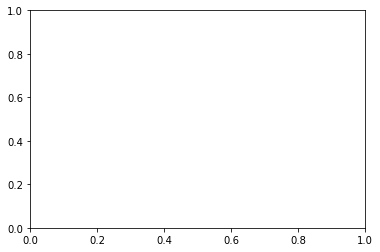

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
X = data_norm
y = labels
n_samples, n_features = data_norm.shape

# Add noisy features
#random_state = np.random.RandomState(0)
#X = np.c_[data_norm, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.NuSVC(nu=0.1,decision_function_shape = "ovr",kernel='poly')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()